In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1380,2020-08-22,United Kingdom,323261.0,323313.0,41454.0,41405.0,-52.0,49.0
1381,2020-08-22,Germany,230198.0,232082.0,9268.0,9267.0,-1884.0,1.0
1382,2020-08-22,Iran,355421.0,354764.0,20440.0,20376.0,657.0,64.0
1383,2020-08-22,Turkey,255635.0,255723.0,6078.0,6080.0,-88.0,-2.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  6290.351624548736
RMSE =  24595.85710497847


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  293.1971119133574
RMSE =  715.9912439212096


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  42093.03787878788
RMSE =  76680.0273563541
-- World performances for deaths --
MAE =  1591.030303030303
RMSE =  1955.3439285168936


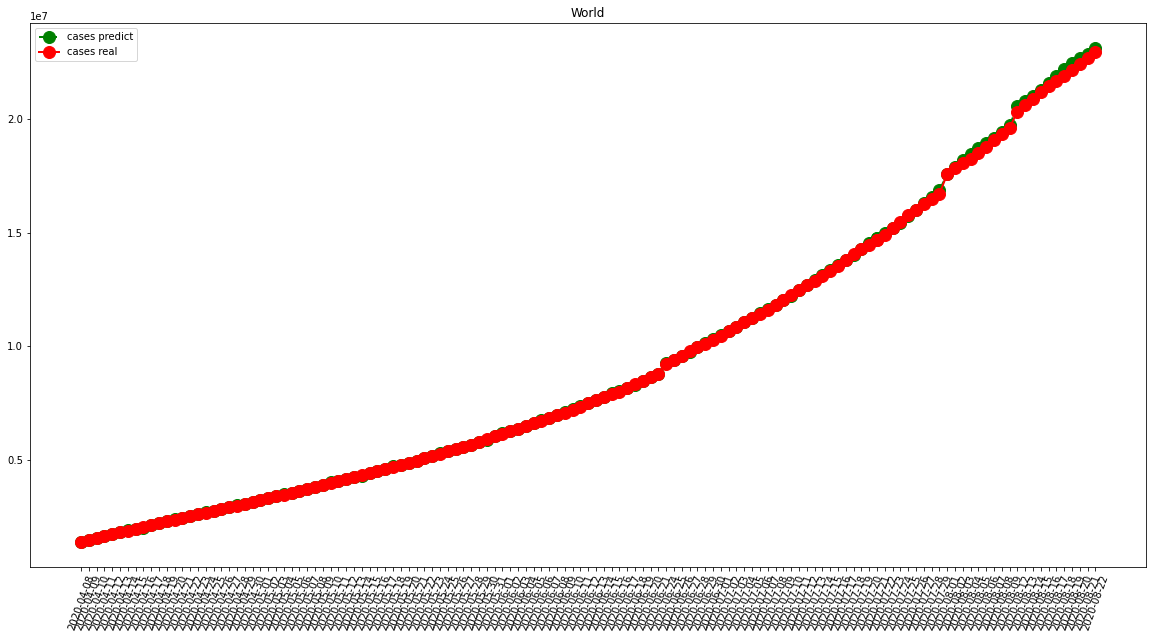

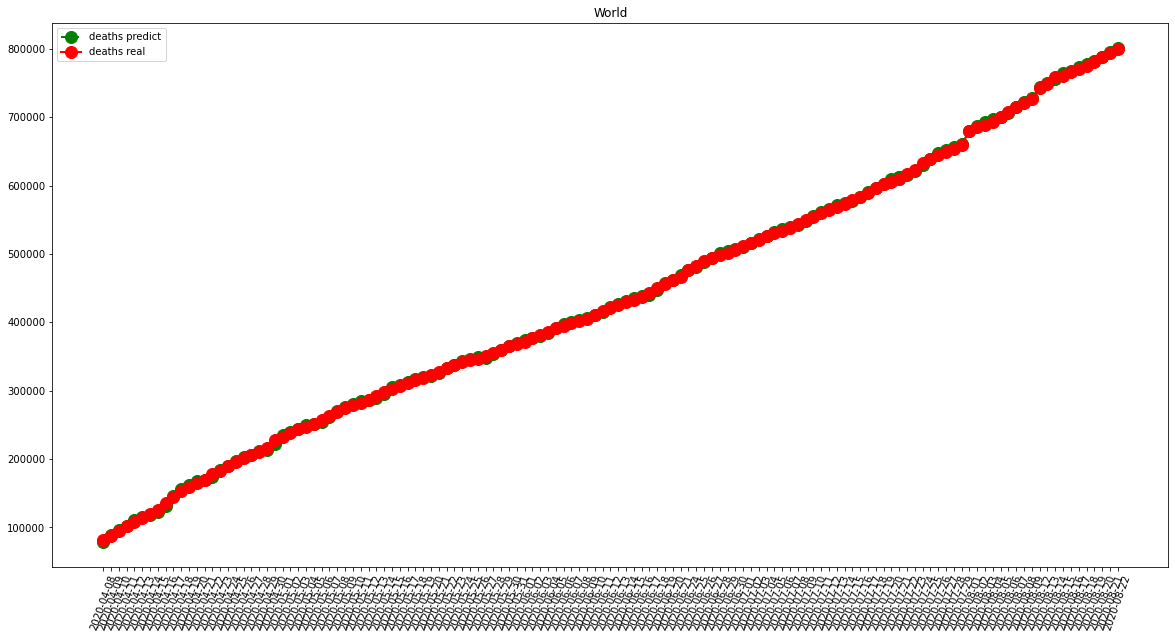

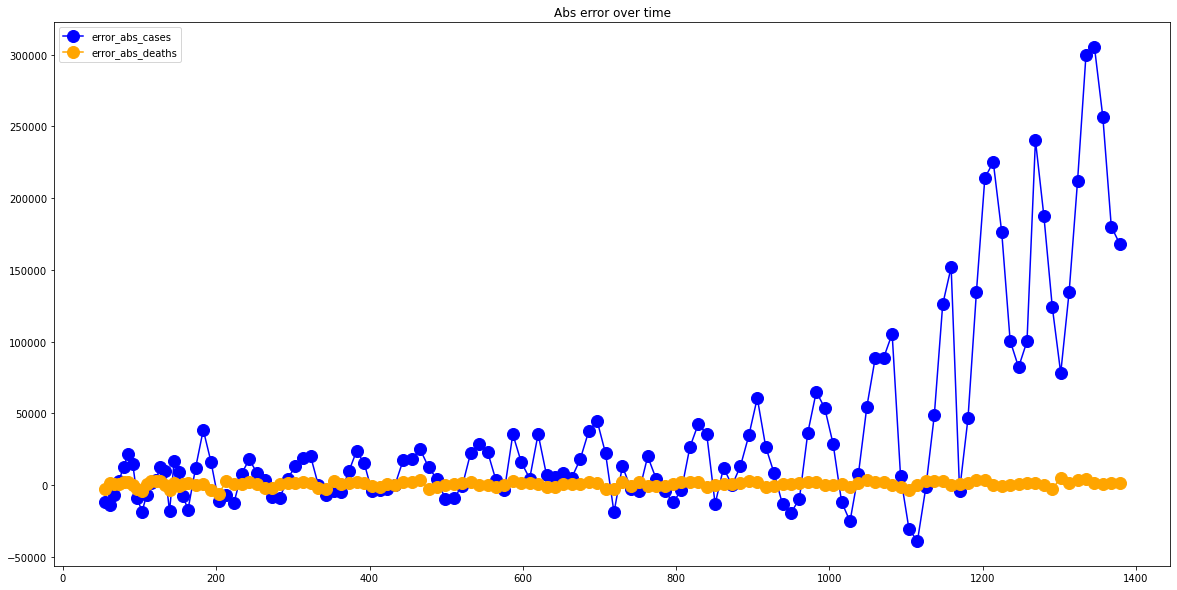

In [7]:
visShow("World")

-- France performances for cases --
MAE =  926.5774647887324
RMSE =  1407.9256642509
-- France performances for deaths --
MAE =  130.03521126760563
RMSE =  281.3950283353119


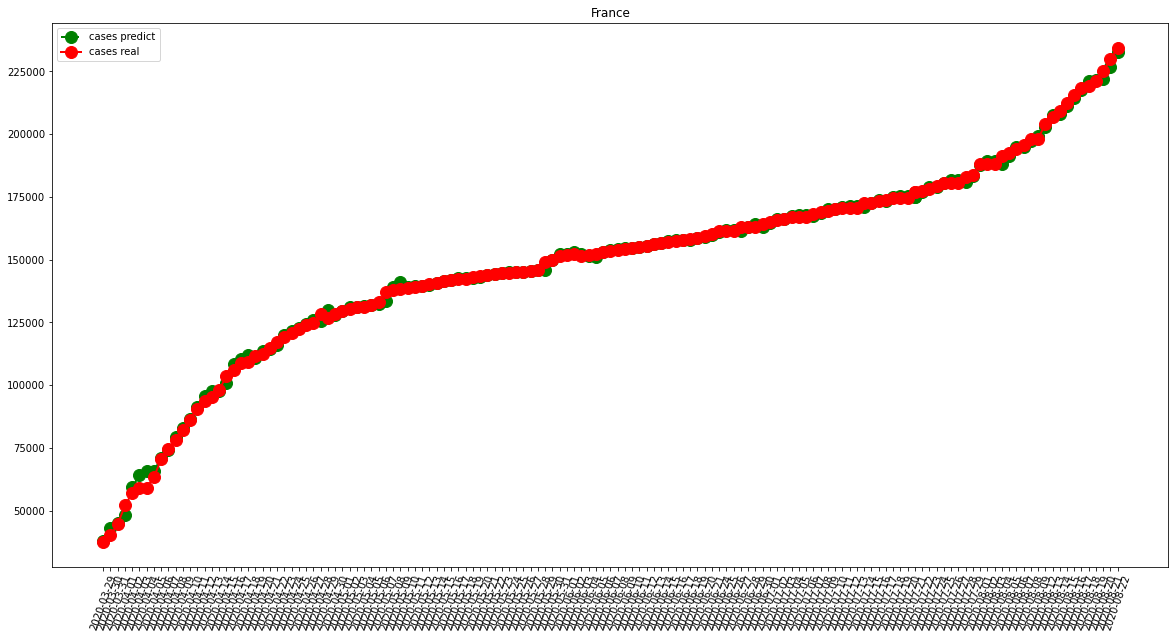

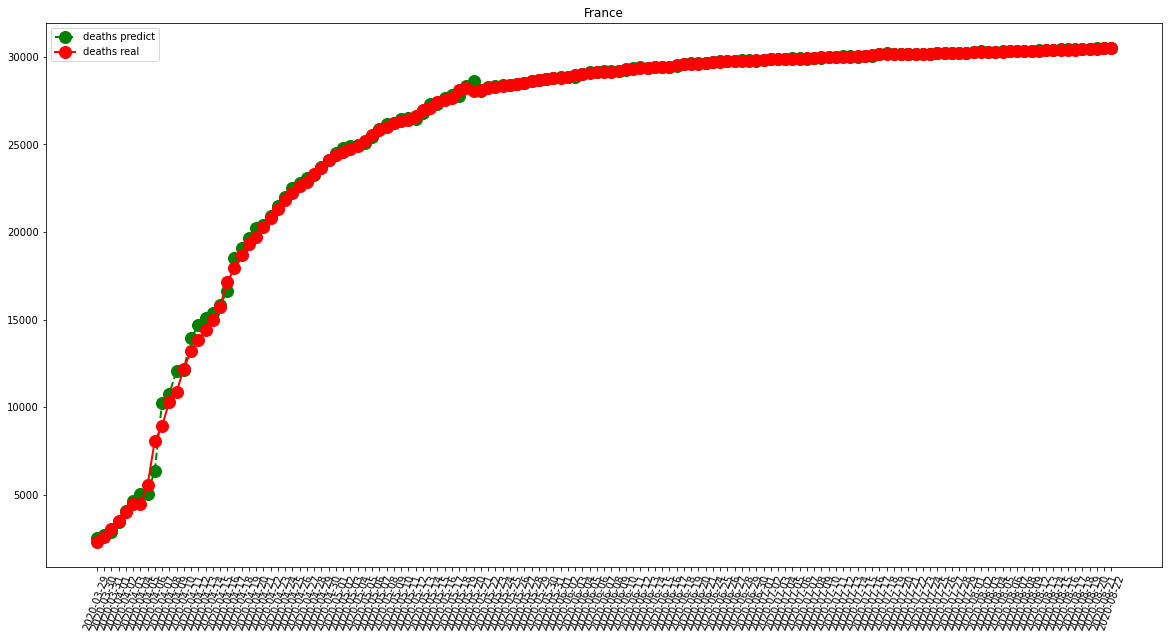

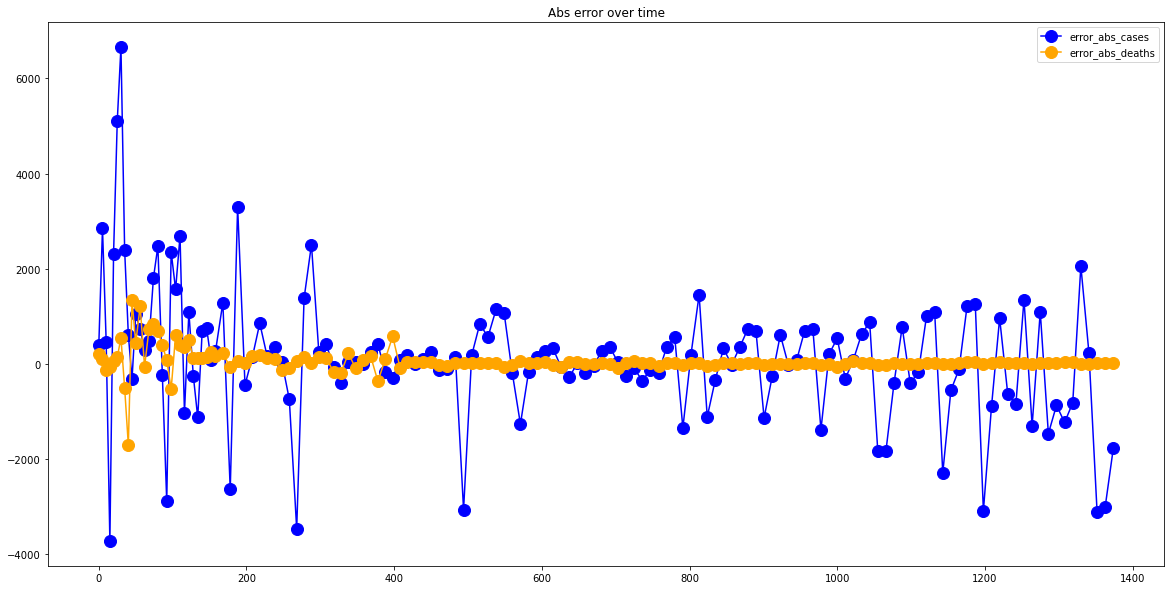

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  304.33098591549293
RMSE =  463.96508337540797
-- Italy performances for deaths --
MAE =  76.94366197183099
RMSE =  249.0442858971636


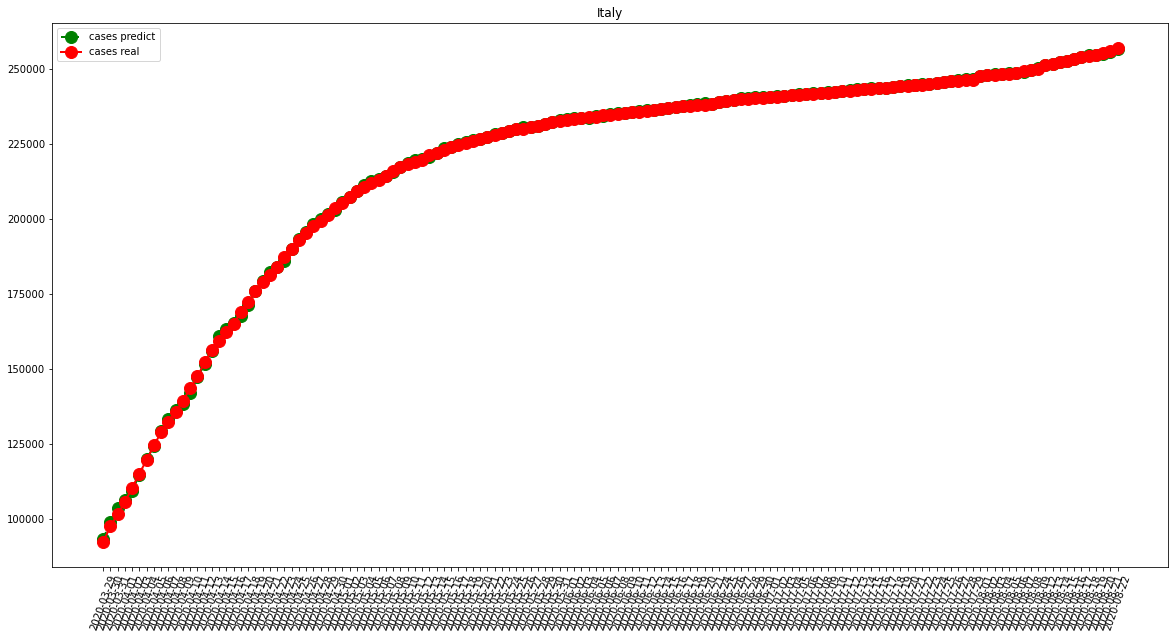

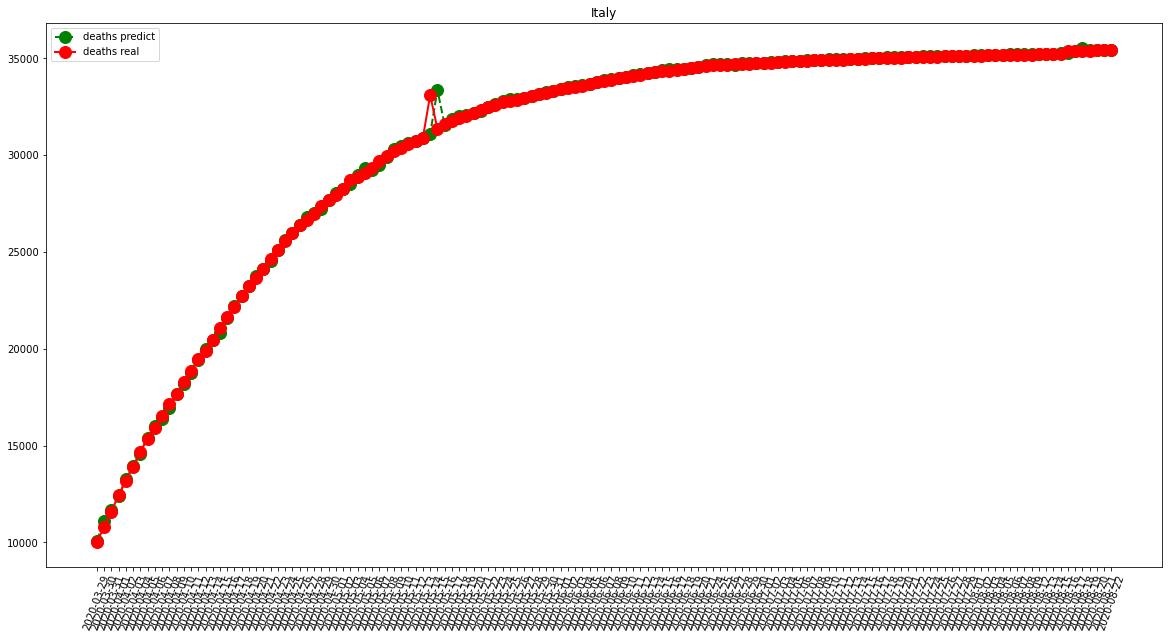

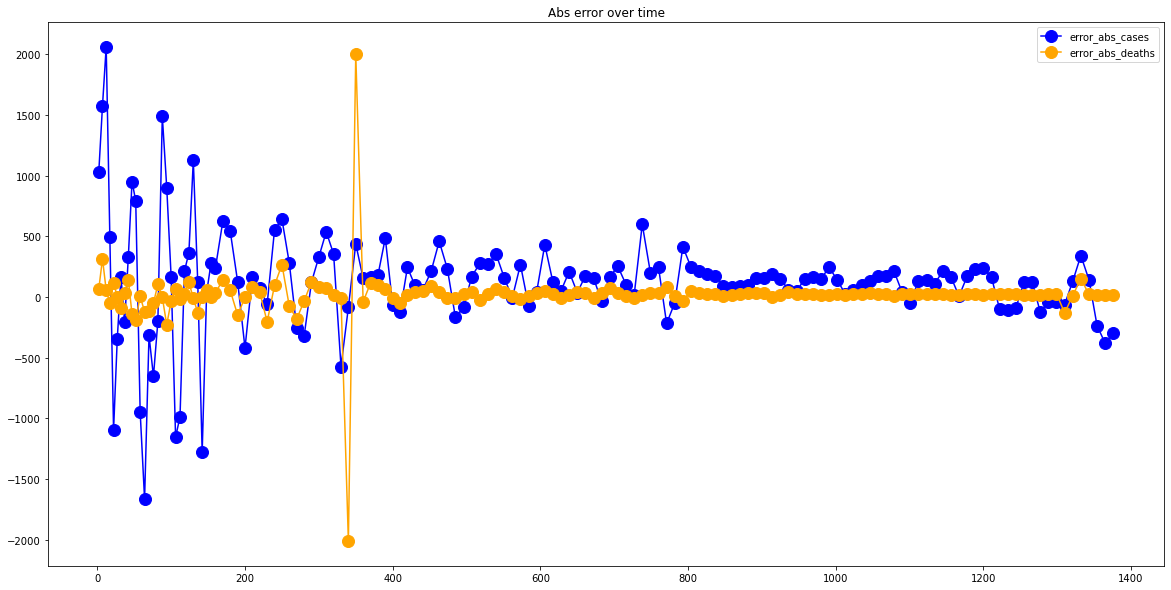

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1472.338028169014
RMSE =  2791.54676191241
-- Spain performances for deaths --
MAE =  133.1267605633803
RMSE =  340.89366811037496


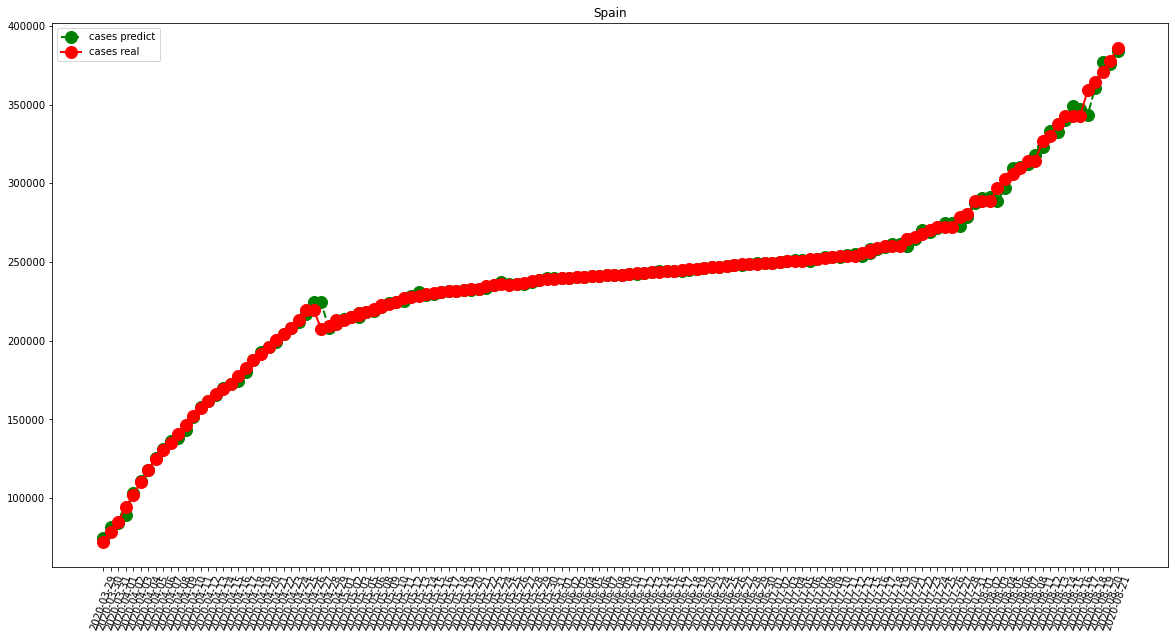

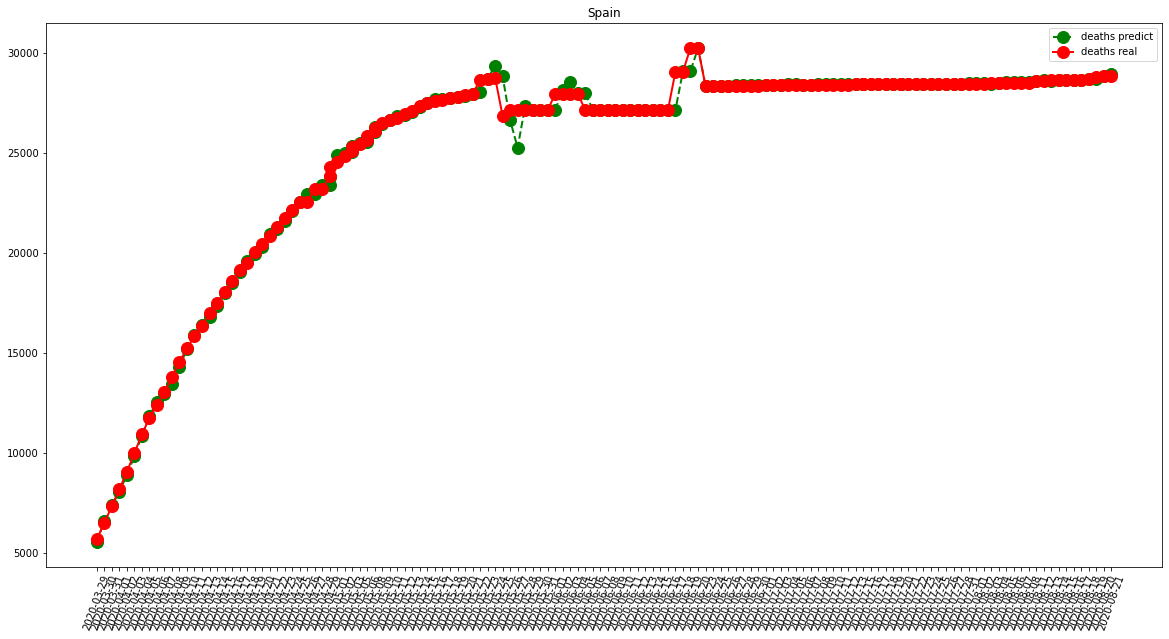

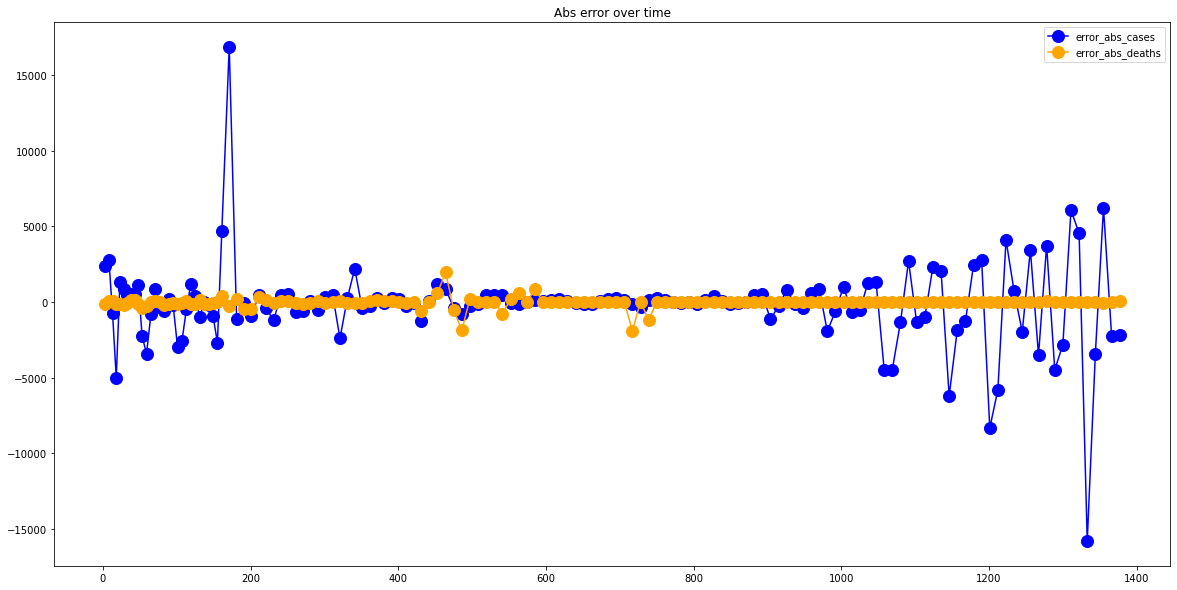

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  9708.31690140845
RMSE =  15211.378015147684
-- United States performances for deaths --
MAE =  492.9154929577465
RMSE =  702.9924768695688


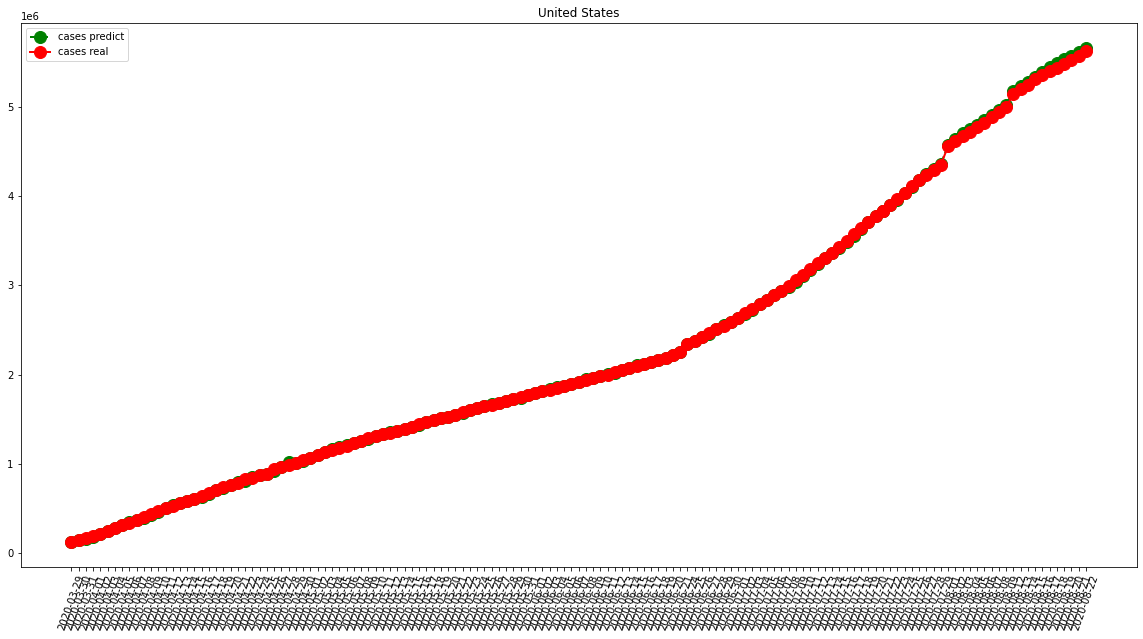

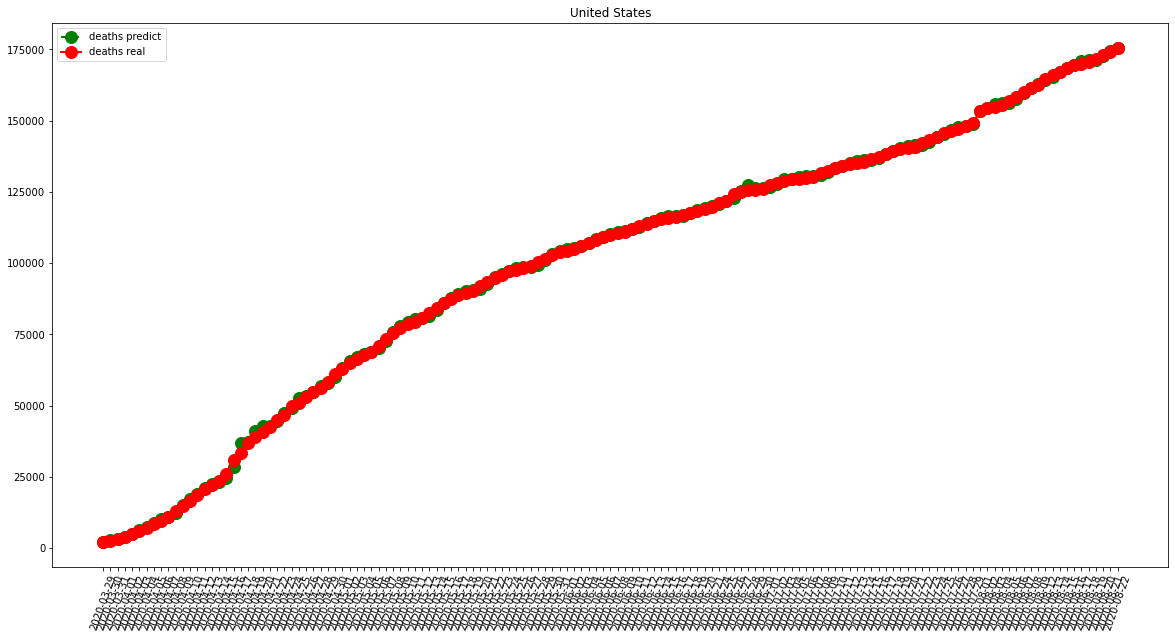

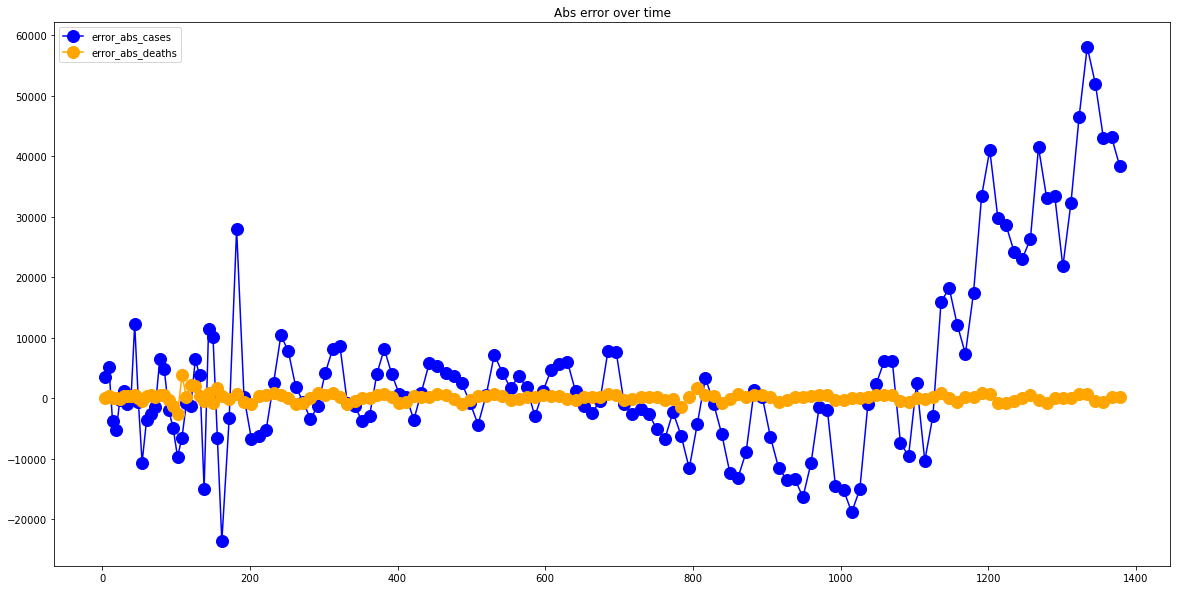

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  69.97183098591549
RMSE =  100.10396004605117
-- China performances for deaths --
MAE =  29.0
RMSE =  131.7626440467752


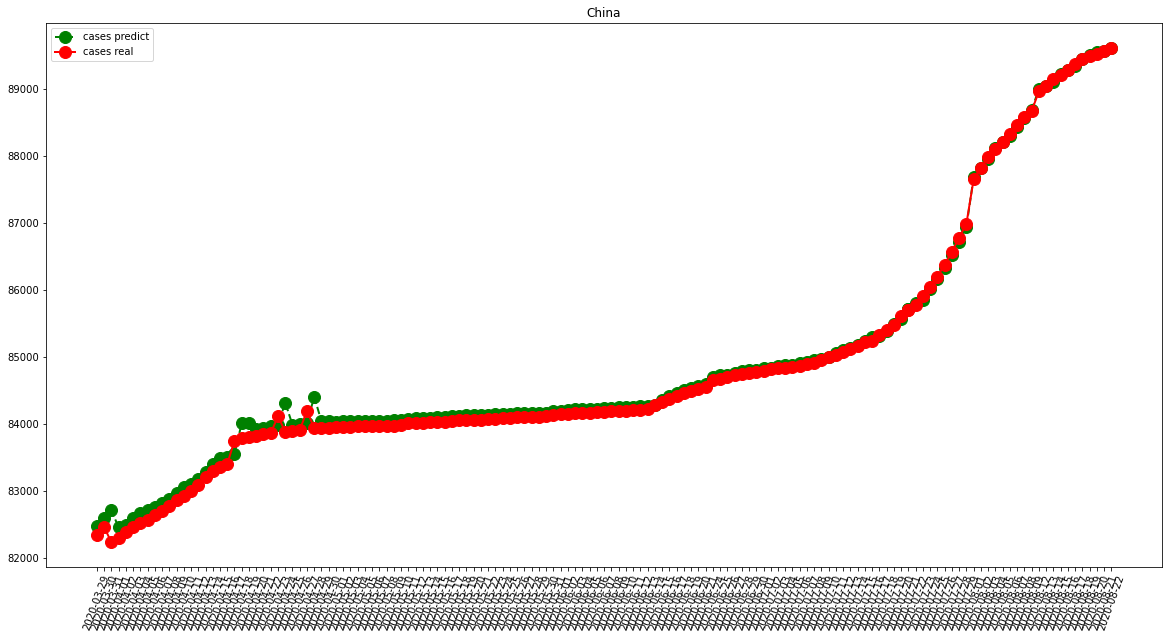

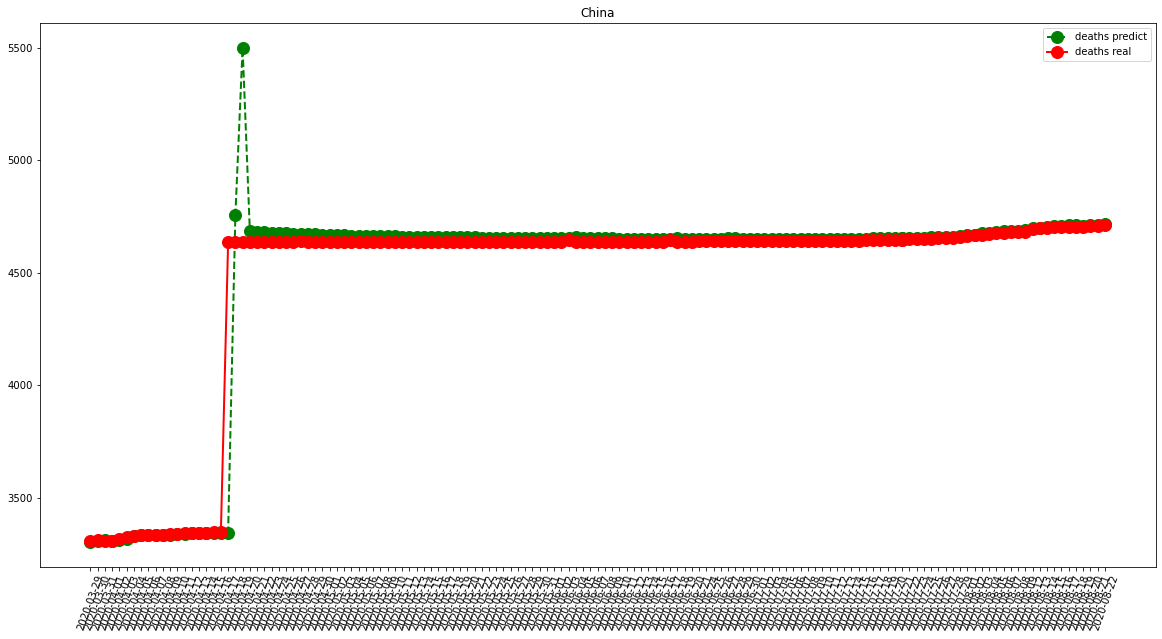

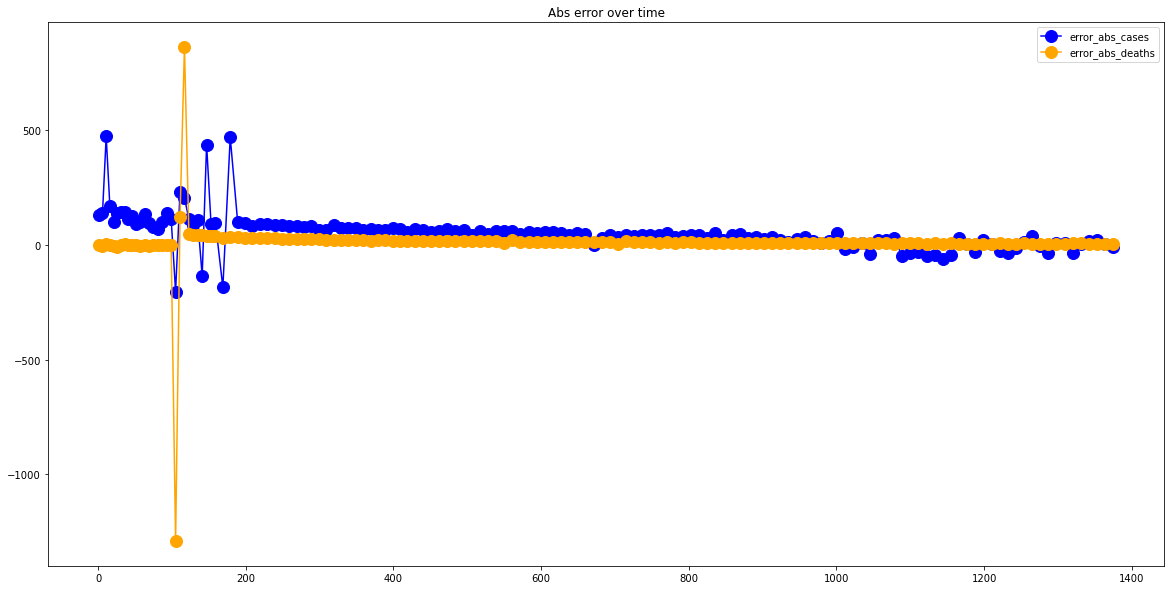

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1135.7280701754387
RMSE =  3915.5224349499636
-- United Kingdom performances for deaths --
MAE =  262.1666666666667
RMSE =  799.2216004755294


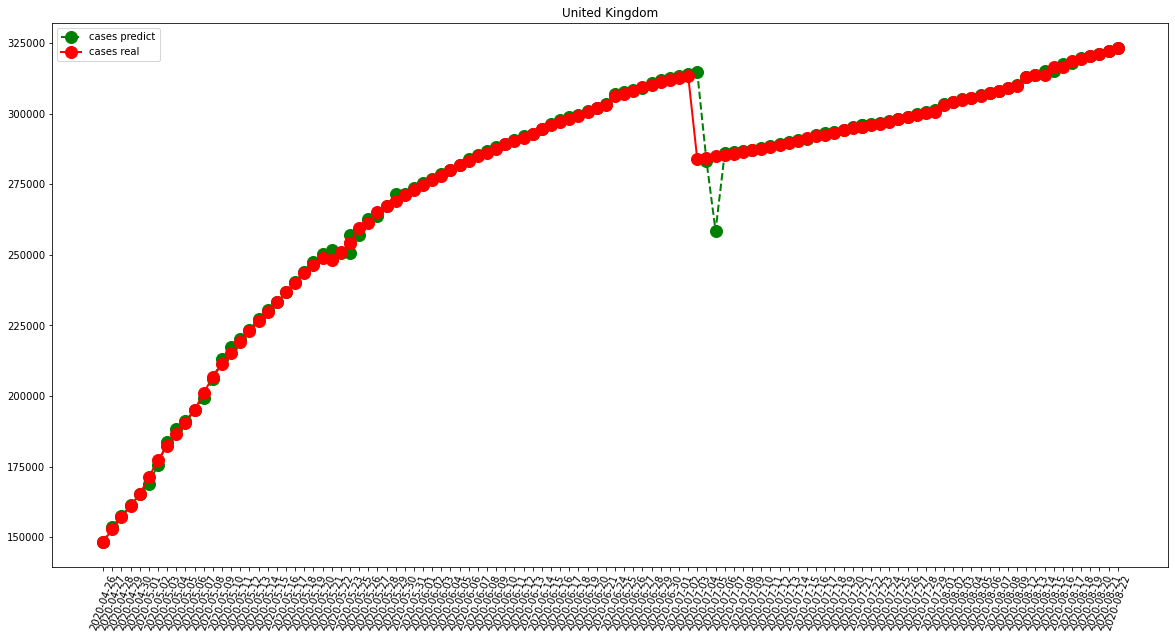

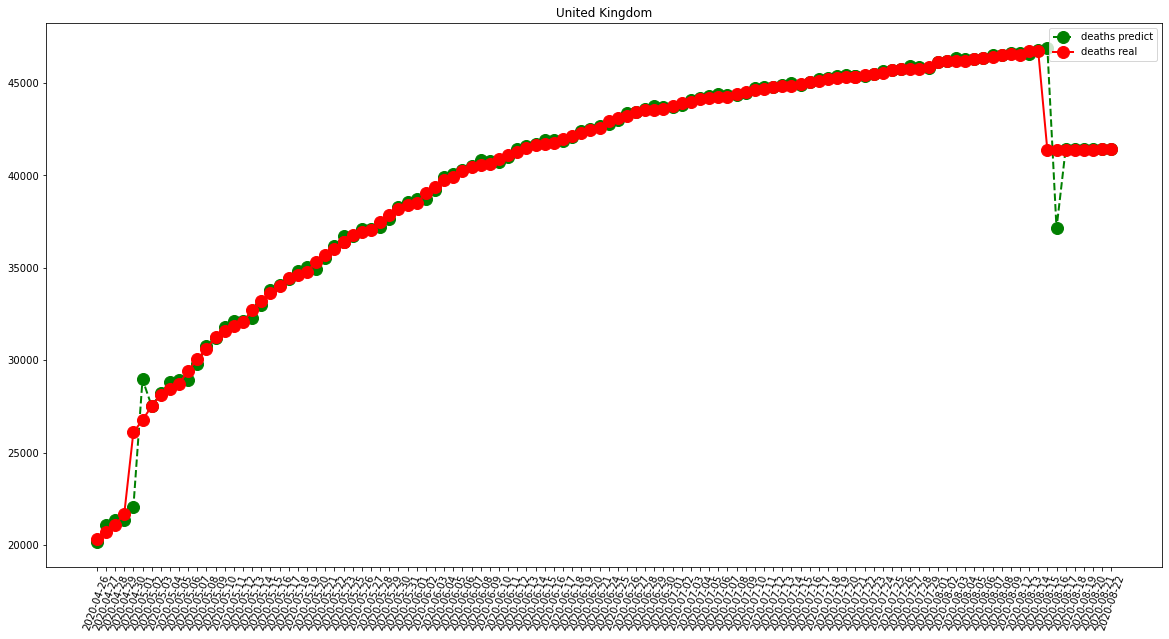

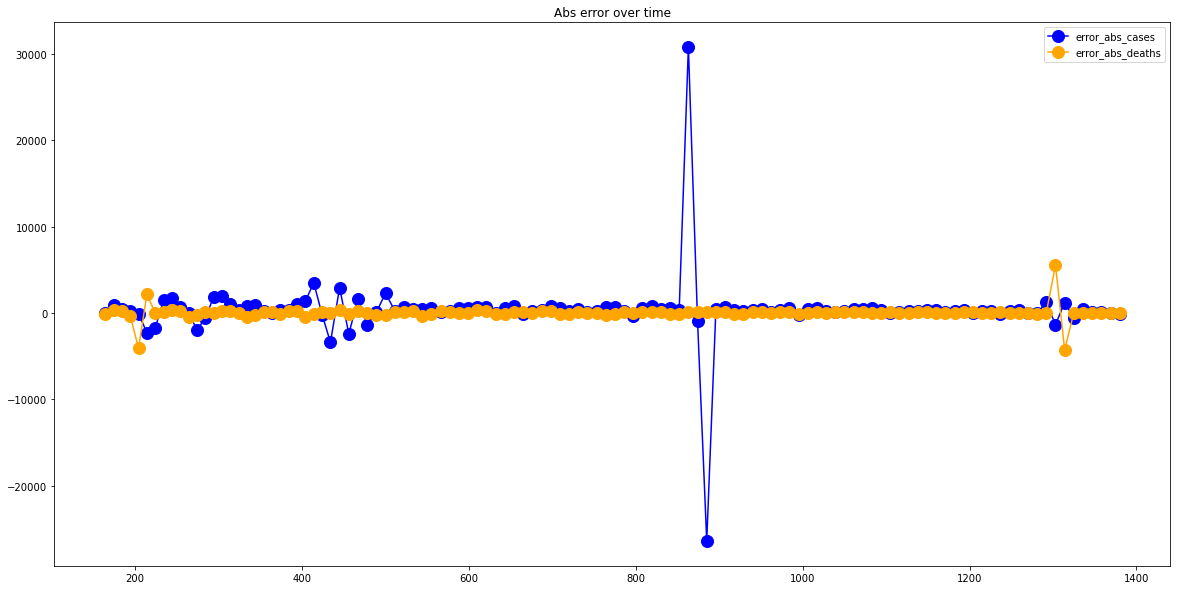

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  375.03508771929825
RMSE =  548.4517282729757
-- Germany performances for deaths --
MAE =  22.342105263157894
RMSE =  41.10651546938864


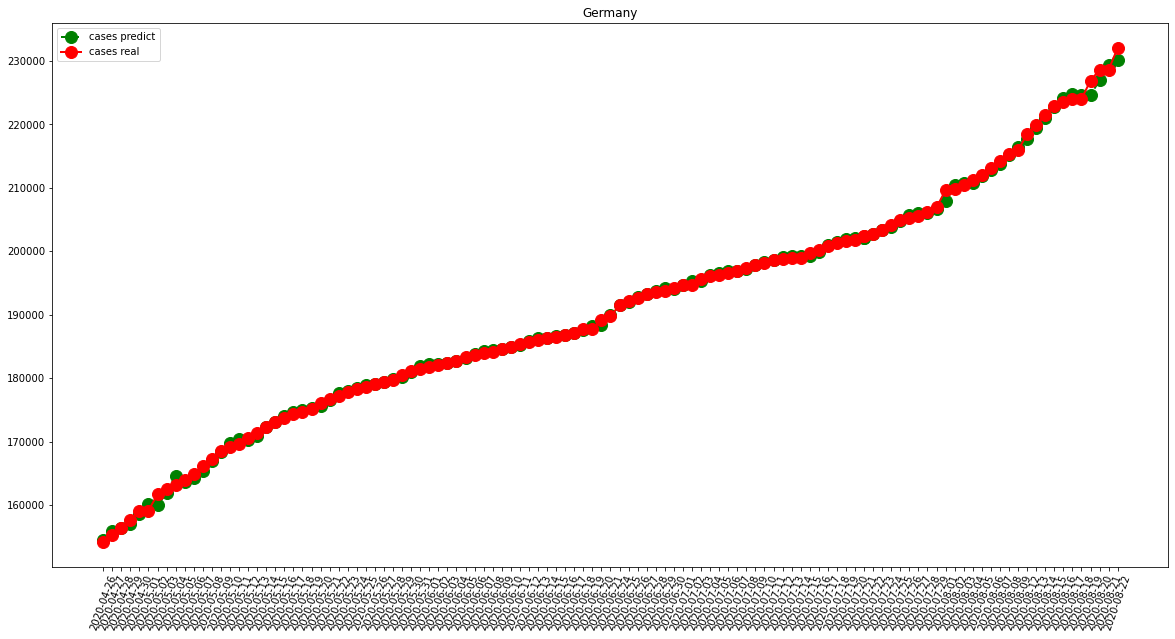

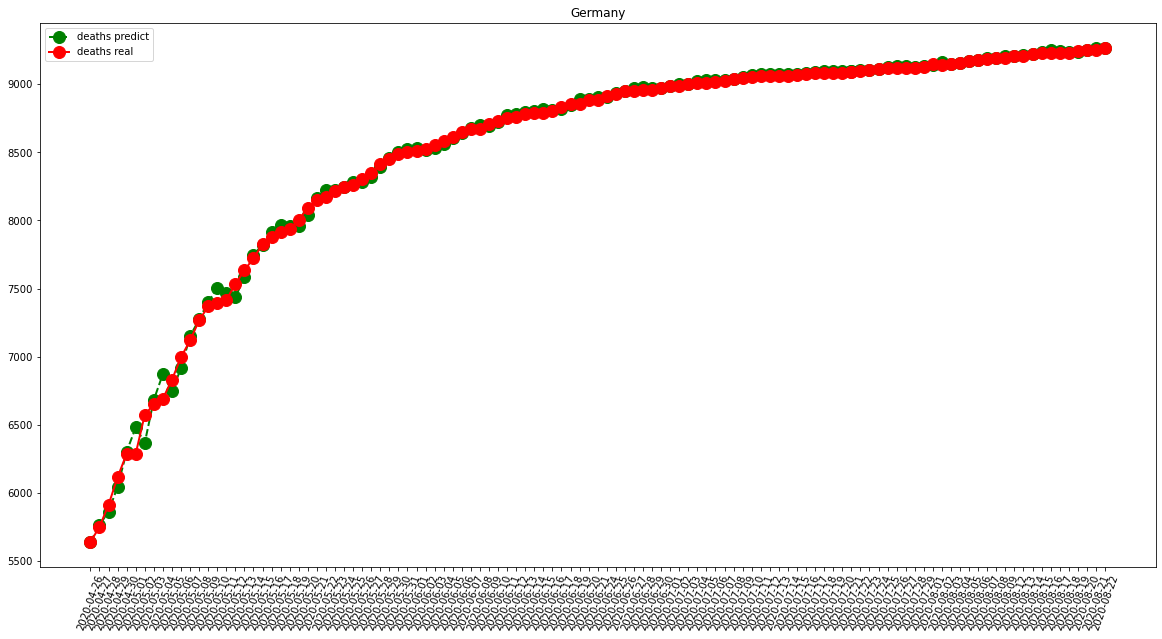

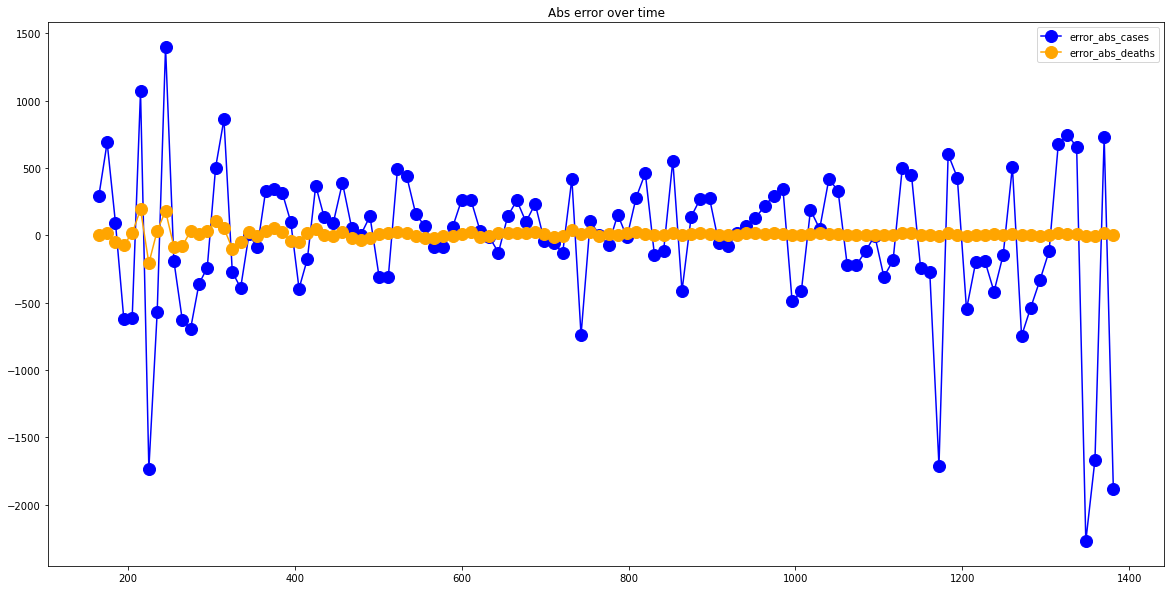

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  681.3684210526316
RMSE =  1008.3328867622616
-- Iran performances for deaths --
MAE =  36.51754385964912
RMSE =  73.4283873592185


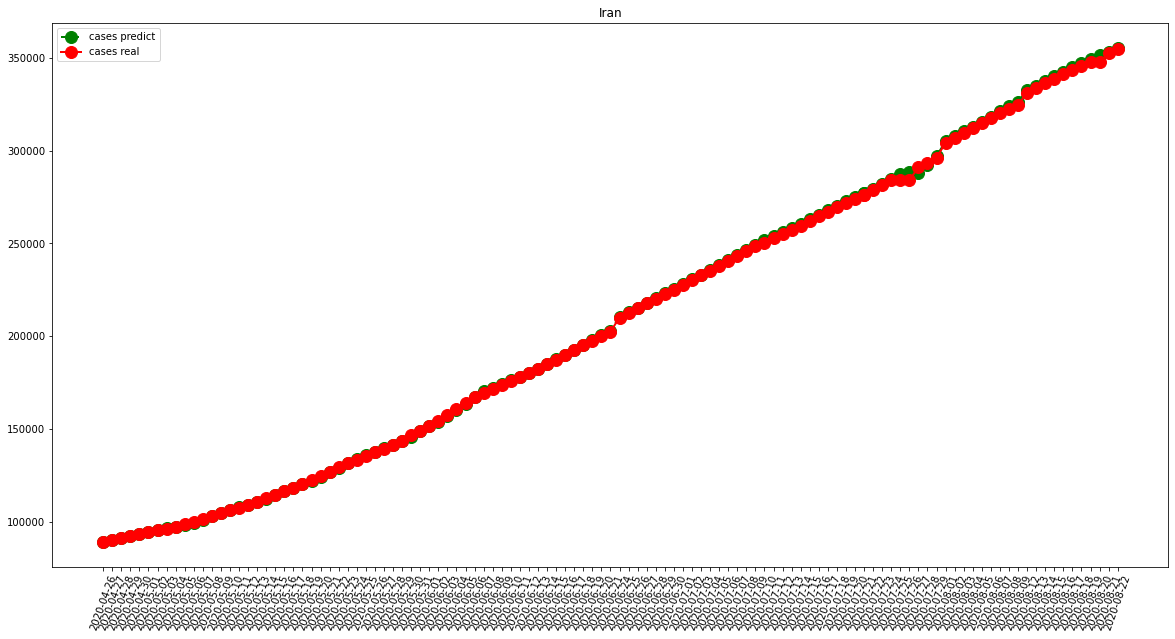

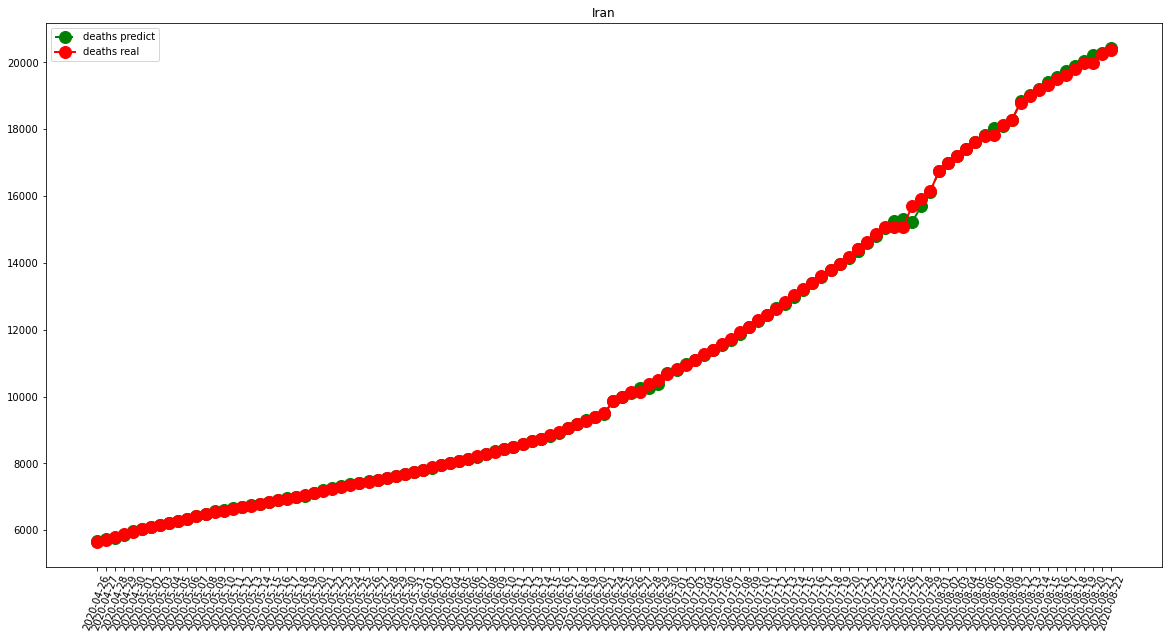

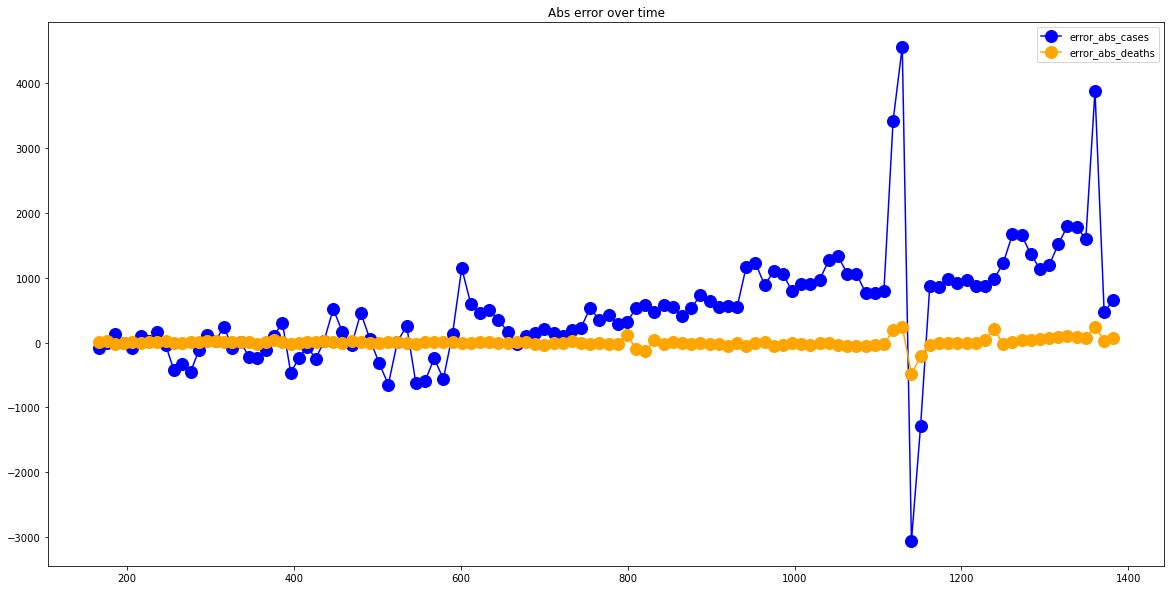

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  196.9298245614035
RMSE =  329.4711605194529
-- Turkey performances for deaths --
MAE =  17.017543859649123
RMSE =  95.08177459244817


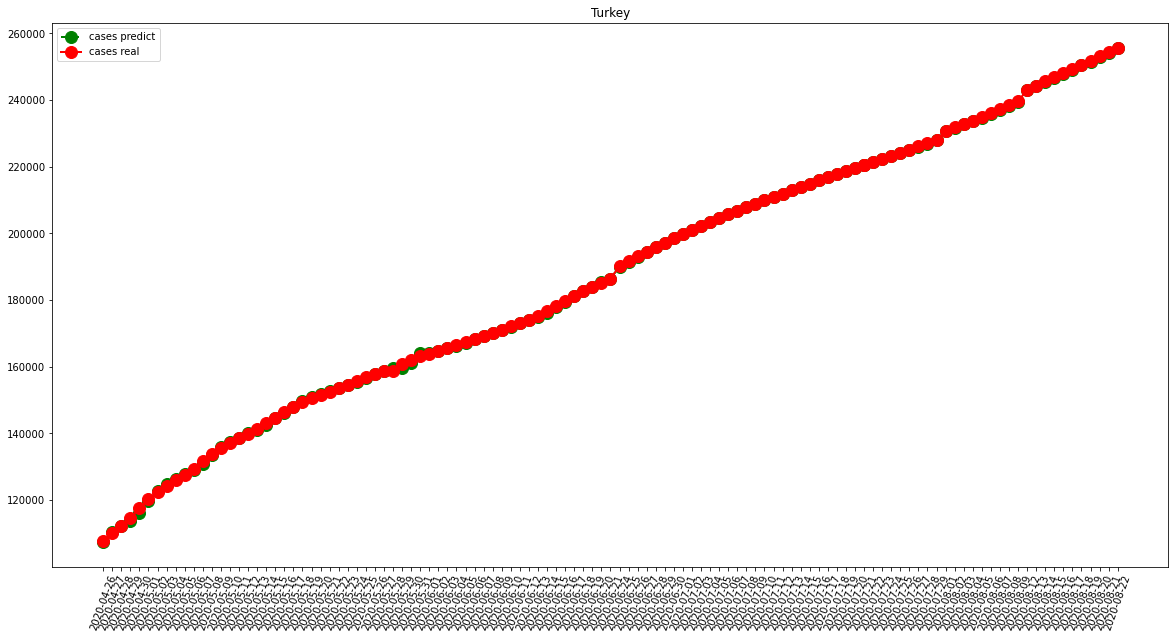

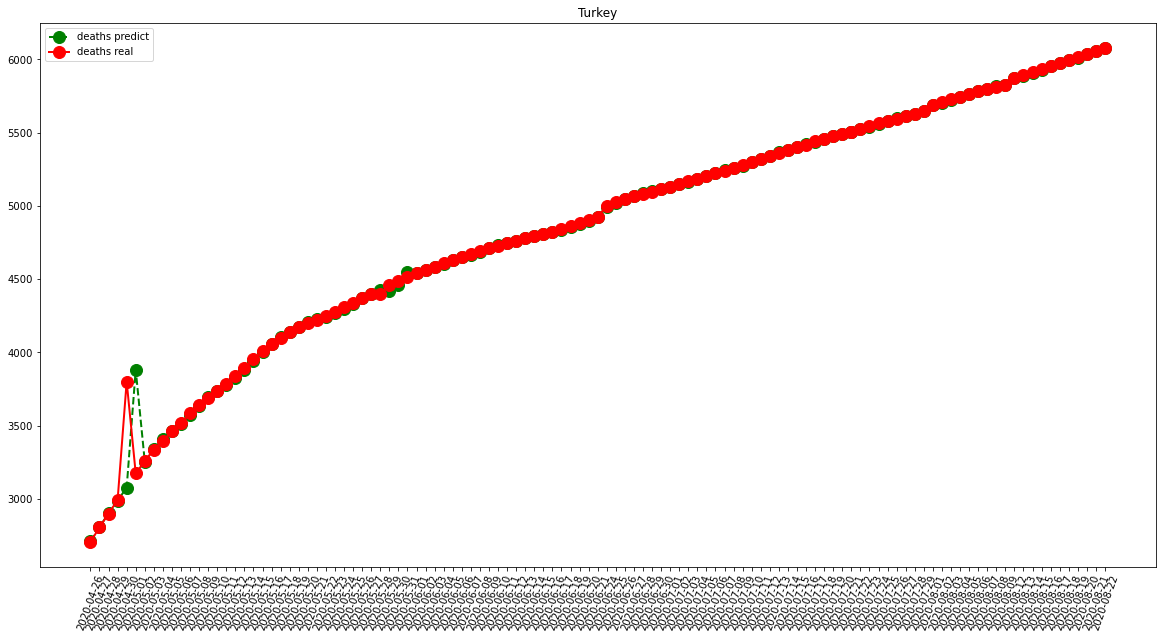

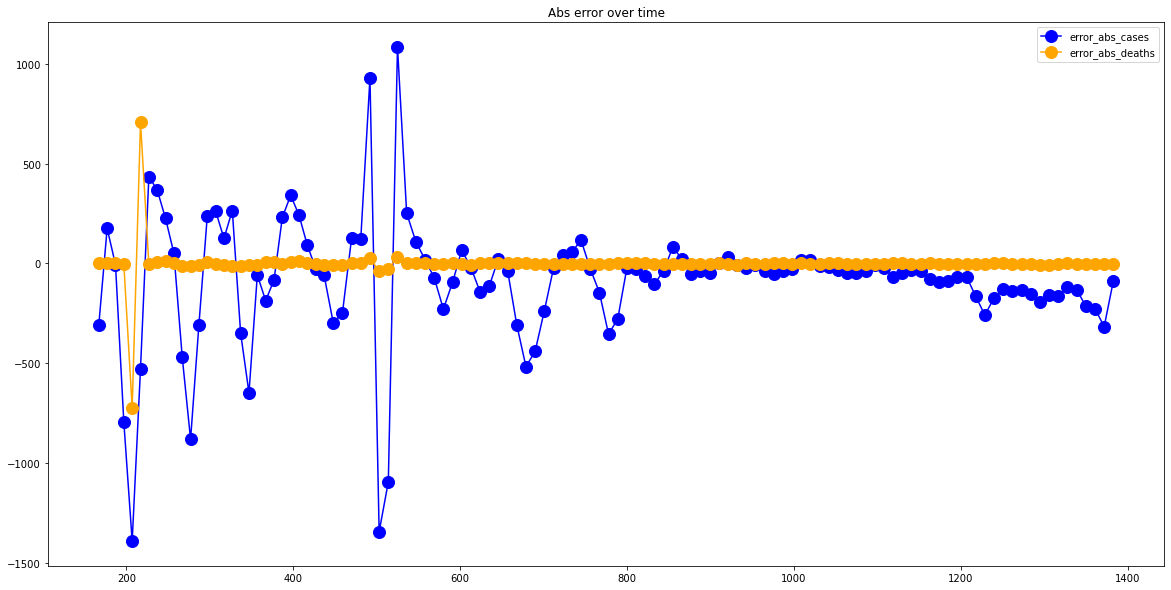

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  12771.551724137931
RMSE =  17133.690196091215
-- Brazil performances for deaths --
MAE =  403.6551724137931
RMSE =  496.8404540510054


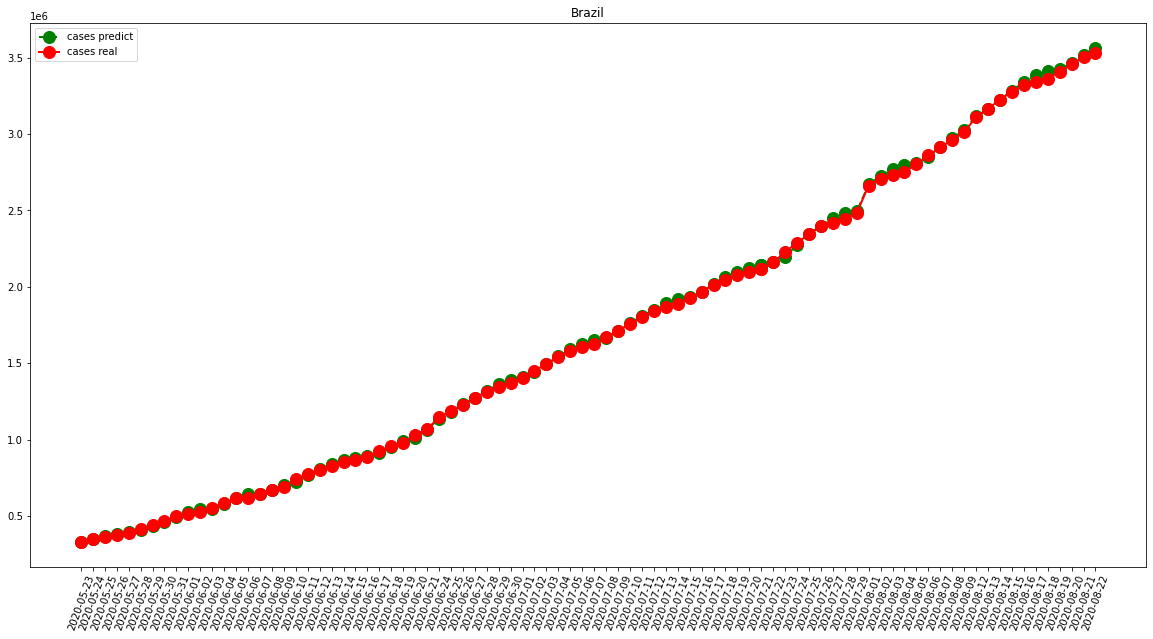

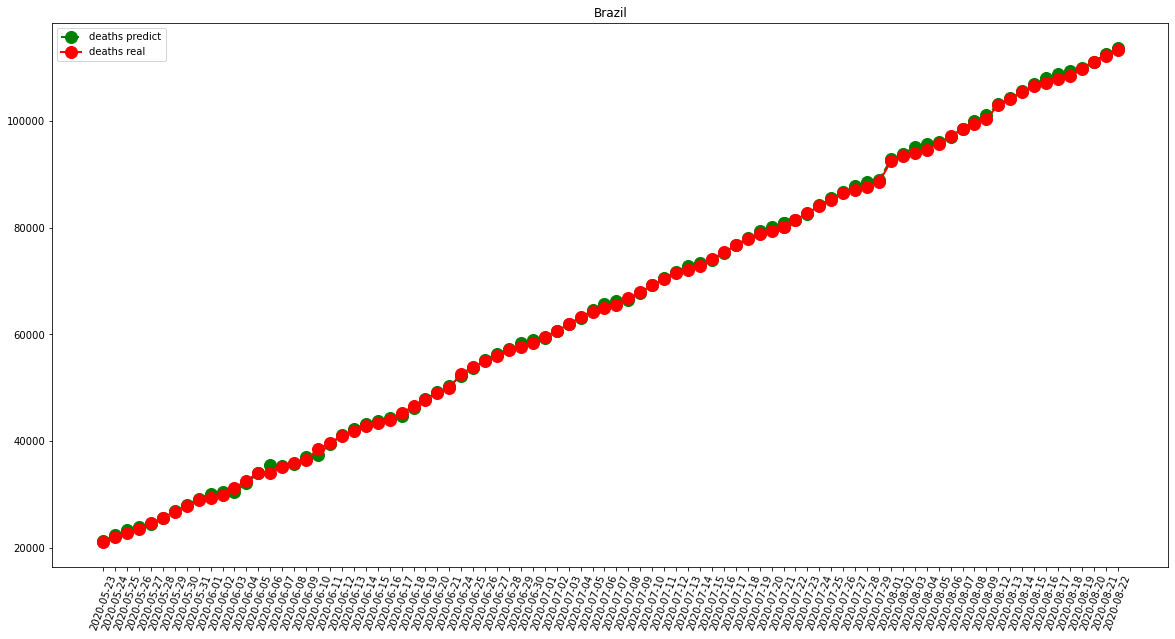

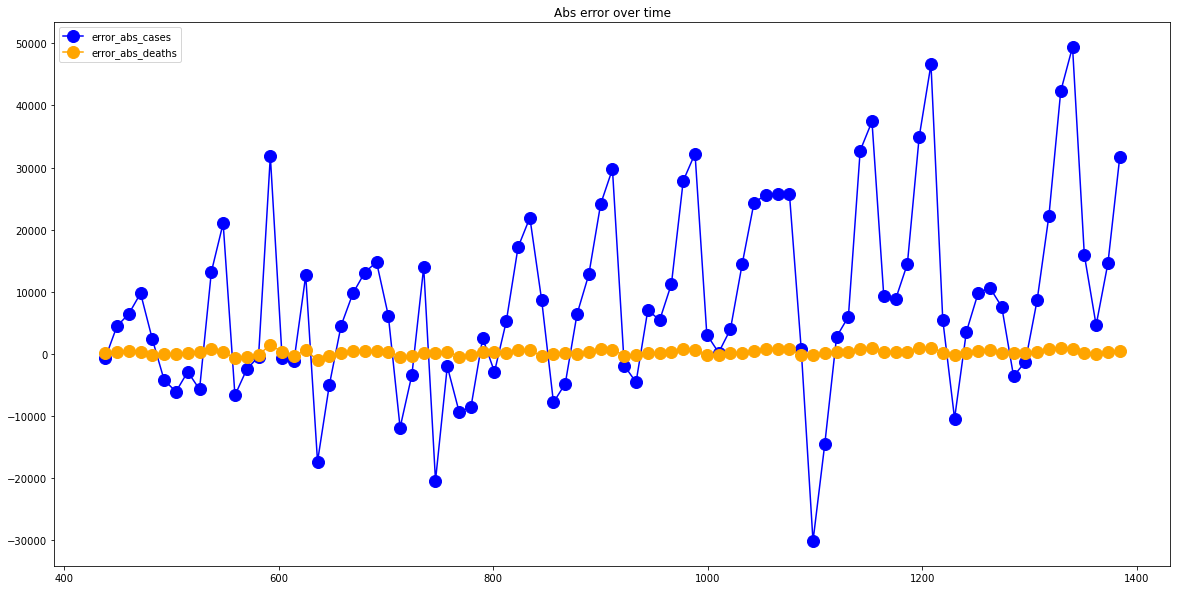

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)